<a href="https://colab.research.google.com/github/gkr0828/gkr0828/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_4%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file="/content/sample_data/chipotle.tsv"
chipo = pd.read_csv(file, sep = "\t")

In [ ]:
#head() > 앞 부분
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
#tail() > 끝 부분
chipo.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [ ]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [ ]:
chipo.isnull()

,order_id,quantity,item_name,choice_description,item_price
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
...,...,...,...,...,...
4617,False,False,False,False,False
4618,False,False,False,False,False
4619,False,False,False,False,False
4620,False,False,False,False,False


In [ ]:
#결측치 확인
chipo.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

##1.가장 많이 주문한 메뉴 Top10

In [ ]:
item_name_10 = chipo['item_name'].value_counts()[:10]
print(item_name_10)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


value : 수량 /
item : 상품명

In [ ]:
for idx, (item, value) in enumerate(item_name_10.items(),1):
    print("{}:{} - {} ".format(idx,item,value))

1: Chicken Bowl - 726 
2: Chicken Burrito - 553 
3: Chips and Guacamole - 479 
4: Steak Burrito - 368 
5: Canned Soft Drink - 301 
6: Steak Bowl - 211 
7: Chips - 211 
8: Bottled Water - 162 
9: Chicken Soft Tacos - 115 
10: Chips and Fresh Tomato Salsa - 110 


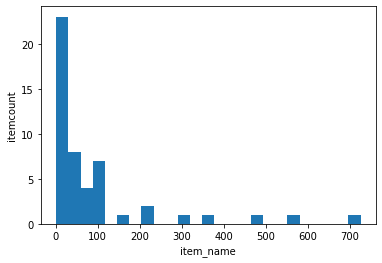

In [ ]:
#hist(막대그래프)그리기
#hist(list명)
item_name = chipo['item_name'].value_counts()
plt.hist(item_name,bins = 25)
plt.xlabel("item_name")
plt.ylabel("itemcount")
plt.show()

## 2. 아이템(item_name) 별 주문수량(quantity) 분석
- 아이템별 주문수량 및 총량
- 시각화 하기


In [ ]:
item_quantity = chipo.groupby('item_name')['quantity'].count()
item_quantity

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [ ]:
item_quantity.index

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

In [ ]:
item_quantity.values

array([ 54,  66,  91,  11,  10,  25, 162,   2,   6, 104, 301,  68,  59,
         7,   1,   6,  40, 726, 553,  47,   9, 110, 115, 211, 110, 479,
         1,  22,  18,  43,  48,  31,  20,   2,  20,  27,   2, 101, 211,
       368,  35,   4,  29,  55,  85,  95,   1,   6,  18,   7])

index : x축 / value : y축

In [ ]:
#x축
item_quantity_index = item_quantity.index.tolist()
x=np.arange(len(item_quantity_index))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
len(item_quantity_index)

50

In [ ]:
#y축
orderd_count = item_quantity.values.tolist()
print(orderd_count)

[54, 66, 91, 11, 10, 25, 162, 2, 6, 104, 301, 68, 59, 7, 1, 6, 40, 726, 553, 47, 9, 110, 115, 211, 110, 479, 1, 22, 18, 43, 48, 31, 20, 2, 20, 27, 2, 101, 211, 368, 35, 4, 29, 55, 85, 95, 1, 6, 18, 7]


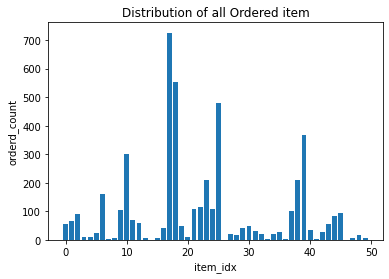

In [ ]:
#bar(x,y)
plt.bar(x,orderd_count)
plt.xlabel("item_idx")
plt.ylabel("orderd_count")
plt.title("Distribution of all Ordered item")
plt.show()

## 3. 주문당 평균 금액
- 10달러 이상 주문한 주문번호
- 아이템별 주문금액 분포도

In [ ]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
chipo.info()
##item_price가 object로 나오는걸 평균 계산을 위해 수치형으로 변환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [ ]:
a = chipo['item_price']
chipo['item_price']=chipo['item_price'].apply(lambda a : float(a[1:]))

In [ ]:
#float 으로 변환됨
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [ ]:
##주문번호당 평균 금액 계산하기
chipo.groupby('order_id')['item_price'].sum()
#object 라서 합쳐지지않고 $11.75 $11.25 출력

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [ ]:
#float으로 변환된 값
item_price =chipo.groupby('order_id')['item_price'].sum()
item_price
#item_price를 그룹에 저장

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [ ]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [ ]:
# x축 : order_id / y축 : item_price
item_price.index
#item_price.index 출력후
item_price_index = item_price.index.tolist()
#item_price_index 를 .tolist 에 저장하고, item_price_index 저장

In [ ]:
x = np.arange(len(item_price_index))
x

array([   0,    1,    2, ..., 1831, 1832, 1833])

In [ ]:
#y축
item_price.values.tolist()
item_price_values=item_price.values.tolist()
item_price.values
print(item_price_values)

[11.56, 16.98, 12.67, 21.0, 13.7, 17.5, 15.7, 10.88, 10.67, 13.2, 12.38, 14.370000000000001, 10.88, 10.08, 10.88, 10.68, 10.08, 24.9, 13.9, 36.2, 23.36, 12.98, 11.17, 12.07, 11.38, 20.5, 13.9, 33.7, 17.98, 23.36, 10.68, 12.98, 13.2, 28.4, 13.4, 18.0, 18.0, 18.57, 12.2, 32.75, 16.2, 13.7, 20.5, 13.2, 21.97, 11.88, 10.08, 13.7, 16.15, 10.88, 18.57, 12.98, 22.45, 15.7, 10.08, 16.65, 16.2, 10.88, 10.98, 22.5, 16.2, 15.7, 15.7, 22.5, 25.45, 11.48, 19.67, 21.95, 10.88, 21.95, 27.45, 10.98, 21.650000000000002, 22.36, 36.2, 10.67, 11.88, 17.48, 10.98, 11.48, 10.67, 20.95, 24.95, 28.46, 11.38, 22.95, 10.08, 10.88, 16.060000000000002, 20.0, 11.88, 20.15, 38.2, 22.5, 16.2, 35.0, 20.15, 22.3, 13.4, 10.08, 12.98, 14.65, 47.9, 12.2, 17.5, 18.0, 10.98, 21.25, 12.07, 36.0, 17.5, 17.98, 10.08, 13.0, 11.38, 12.2, 12.98, 10.88, 16.98, 10.18, 12.48, 11.77, 23.78, 28.4, 31.7, 20.0, 12.5, 24.95, 29.990000000000002, 11.38, 10.88, 22.15, 10.68, 22.15, 13.2, 17.48, 17.5, 10.67, 12.15, 11.08, 16.98, 11.38, 12.4

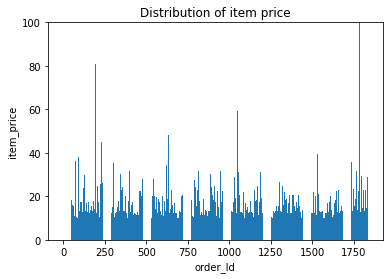

In [ ]:
plt.bar(x,item_price_values)
plt.xlabel('order_Id')
plt.ylabel("item_price")
plt.ylim([0,100])
plt.title("Distribution of item price")
plt.show()

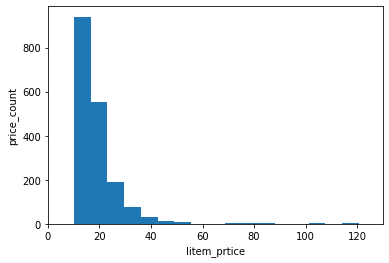

In [ ]:
#hist()그리기
plt.hist(item_price,bins = 30)
plt.xlim([0,130])
plt.xlabel('litem_prtice')
plt.ylabel('price_count')
plt.show()